1. Data Preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Preprocessing Training Dataset

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
training_set = train_datagen.flow_from_directory('D:\\ML Projects\\Deep Learning\\brain tumor detection\\Dataset\\Training',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 5712 images belonging to 4 classes.


In [7]:
# Preprocessing Testing Dataset
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('D:\\ML Projects\\Deep Learning\\brain tumor detection\\Dataset\\Testing',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


2. Building The CNN Model

In [17]:
cnn= tf.keras.models.Sequential()

In [19]:
# Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Max Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [23]:
# Adding Another Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [25]:
# Adding Another Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [27]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [29]:
# Full Connection Layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))


In [31]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

3. Training CNN

In [33]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [39]:
history = cnn.fit(
    training_set,
    validation_data=test_set,
    epochs=25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.3393 - loss: 1.2959

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 119s 655ms/step - accuracy: 0.3397 - loss: 1.2954 - val_accuracy: 0.4470 - val_loss: 1.2152
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 422ms/step - accuracy: 0.5740 - loss: 0.9861 - val_accuracy: 0.4905 - val_loss: 1.3850
Epoch 4/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 424ms/step - accuracy: 0.6325 - loss: 0.8709 - val_accuracy: 0.5645 - val_loss: 1.1940
Epoch 6/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 438ms/step - accuracy: 0.6570 - loss: 0.8476 - val_accuracy: 0.6499 - val_loss: 1.0156
Epoch 8/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 450ms/step - accuracy: 0.6716 - loss: 0.8014 - val_accuracy: 0.6613 - val_loss: 0.9465
Epoch 10/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 429ms/step - accuracy: 0.6853 - loss: 0.7822 - val_accura

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm)

print('Classification Report')
target_names = ['glioma', 'meningioma', 'no tumor', 'pituitary']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step
Confusion Matrix
[[ 33  11 135 121]
 [ 27  17 129 133]
 [ 40  25 166 174]
 [ 28  12 134 126]]
Classification Report
              precision    recall  f1-score   support

      glioma       0.26      0.11      0.15       300
  meningioma       0.26      0.06      0.09       306
    no tumor       0.29      0.41      0.34       405
   pituitary       0.23      0.42      0.30       300

    accuracy                           0.26      1311
   macro avg       0.26      0.25      0.22      1311
weighted avg       0.26      0.26      0.23      1311



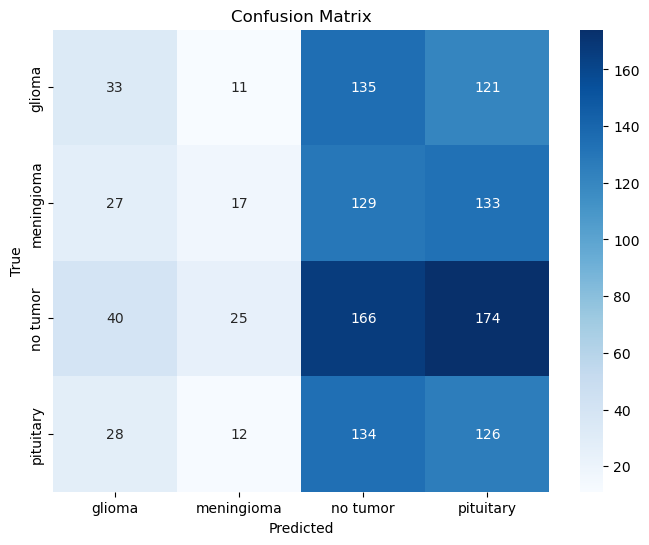

In [51]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [69]:
import numpy as np
from keras.preprocessing import image

# Load the image you want to predict
image_path = 'D:\\ML Projects\\Deep Learning\\brain tumor detection\\Dataset\\Testing\\glioma\\Te-gl_0027.jpg'  # Replace with the actual path of your image
test_image = image.load_img(image_path, target_size=(150, 150))  # Same target size as the model
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Expanding dimensions to match the input shape (1, 150, 150, 3)

# Rescale image
test_image /= 255.0  # Make sure the image is normalized just like your training data

# Perform prediction
result = cnn.predict(test_image)

# Mapping the prediction to class labels
class_labels = list(training_set.class_indices.keys())  # Get the class labels from training set
predicted_class = np.argmax(result)  # Get the index of the highest prediction probability
prediction = class_labels[predicted_class]  # Get the class label corresponding to the predicted index

# Output the prediction
print(f"Predicted class: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: glioma


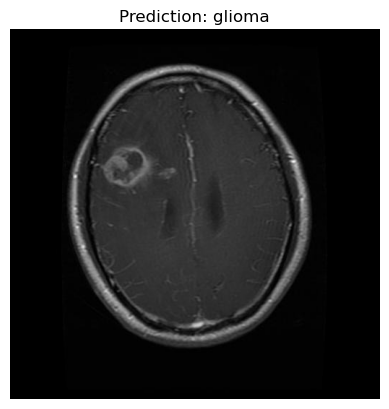

In [71]:
import matplotlib.pyplot as plt

plt.imshow(image.load_img(image_path)) 
plt.title(f'Prediction: {prediction}')  
plt.axis('off')
plt.show()